# Project 2 - NO2

## Description

The data are a subsample of 500 observations from a data set that originate in a study submitted by Magne Aldrin [28/Jul/04].
Aim of the study was to verify whether air pollution at a road is related to traffic volume and meteorological variables, collected by the Norwegian Public Roads Administration.

Description of the variables:
- **x1** hourly values of the logarithm of the concentration of NO2 (particles), measured at Alnabru in Oslo, Norway, between October 2001 and August 2003.
- **x2** logarithm of the number of cars per hour
- **x3** temperature 2 meters above ground (Celsius degrees)
- **x4** wind speed (meters/second)
- **x5** temperature difference between 25 and 2 meters above ground (Celsius degrees)
- **x6** wind direction (degrees between 0 and 360),
- **x7**, **x8** hour of day and day number from October 1, 2001

## Tasks

Provide a qualitative description of the variables in the dataset and of their distribution, using histograms, pie charts, tables or other graphical instruments.
Then answer specifically to the following questions:
1. Divide the hour of day into day and night hours, paying also attention to the season, that is quite relevant in Norway. Is there a significant difference in the mean of concentration of NO2 during day and night hours?
2. Divide each of the climatic variables x3,x4,x5 into two groups (high temperature/low temperature, high wind speed/low wind speed, etc.) and check for each of them if there is a significant difference in the mean of concentration of NO2 in the two identified groups.
3. Divide x2 into two groups (high number of cars/low number of cars), and check if there is a significant difference in the mean of concentration of NO2 in the two identified groups.
4. Deduce which of the variables x2-x8 is more influent in changing the concentration of NO2 in the air, discussing also the presence of possible correlations between x2-x8

## Solution

### Data preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

Read the dataset and rename the columns in a meaningful way

In [2]:
column_map = {
    "x1": "log_no2",
    "x2": "log_cars_num",
    "x3": "temp_2",
    "x4": "wind_speed",
    "x5": "temp_diff_25_2",
    "x6": "wind_dir",
    "x7": "hour",
    "x8": "day"
}

data = pd.read_csv("NO2.csv").rename(columns=column_map)
data.head()

,log_no2,log_cars_num,temp_2,wind_speed,temp_diff_25_2,wind_dir,hour,day
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115


Create a meaningful **date** column which will contain exact date in *yyyy-mm-dd* format starting from October 1, 2001 as mentioned in the description.

In [3]:
import datetime

start_date = datetime.date(2001, 10, 1)
data["date"] = data.apply(lambda x: datetime.timedelta(days=x["day"]) + start_date, axis=1)
data["date"] = pd.to_datetime(data["date"])
data.head()

,log_no2,log_cars_num,temp_2,wind_speed,temp_diff_25_2,wind_dir,hour,day,date
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600,2003-05-24
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196,2002-04-15
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513,2003-02-26
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143,2002-02-21
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115,2002-01-24


Now we create some additional columns like **dow** (day of week), **month** and **yea**. We can use them in the further analysis while applying aggregation functions over the time frame, e.g. comparing the mean **log_no2** value in each day of the week.

In [4]:
data["dow_name"] = data["date"].dt.day_name()
data["dow_num"] = data["date"].dt.day_of_week
data["month_num"] = data["date"].dt.month
data["month_name"] = data["date"].dt.month_name()
data["year"] = data["date"].dt.year
data.head()

,log_no2,log_cars_num,temp_2,wind_speed,temp_diff_25_2,wind_dir,hour,day,date,dow_name,dow_num,month_num,month_name,year
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600,2003-05-24,Saturday,5,5,May,2003
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196,2002-04-15,Monday,0,4,April,2002
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513,2003-02-26,Wednesday,2,2,February,2003
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143,2002-02-21,Thursday,3,2,February,2002
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115,2002-01-24,Thursday,3,1,January,2002


### Quantitative univariate analysis

**IMPORTANT** For drawing the plots I suggest you using **matplotlib** or **seaborn**. Please NAME YOUR X AND Y VARIABLES on each plot and WRITE DOWN YOUR CONCLUSIONS after each task completed.

**Task 1.1** Draw the **histograms** of the variables *log_cars_num*, *wind_speed*, *wind_dir*.

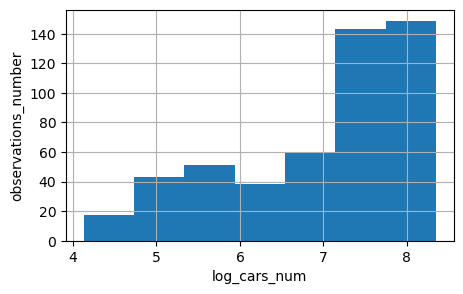

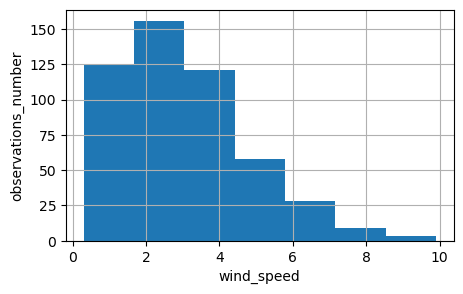

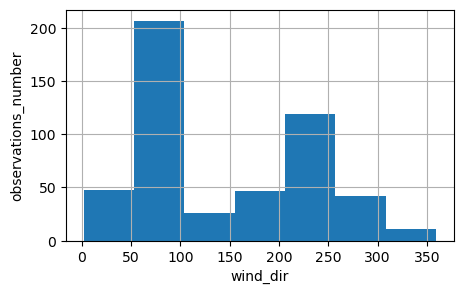

In [5]:
#Three histograms are presented here, reflecting the frequency distribution of the parameters log_cars_num, wind_speed, wind_dir relative to the total number of observations.
#The first graph shows that in more than half of the observations, the logarithm of the number of cars was 7 or more.
#In the case of wind speed observations, the most frequent values were between 0.3 and 4.4 meters per second.
#In the direction of the wind, the northern - northeastern and western directions prevailed.

data['log_cars_num'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('log_cars_num')
plt.ylabel('observations_number')
plt.show()

data['wind_speed'].hist(bins = 7, figsize = (5, 3))
plt.xlabel('wind_speed')
plt.ylabel('observations_number')
plt.show()

data['wind_dir'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('wind_dir')
plt.ylabel('observations_number')
plt.show()

**Task 1.2** Draw the joint **histogram** (two histograms of different color in one plot) of the temperature at the 2 meters and 25 meters above the ground (you need to create the latter value by yourself).

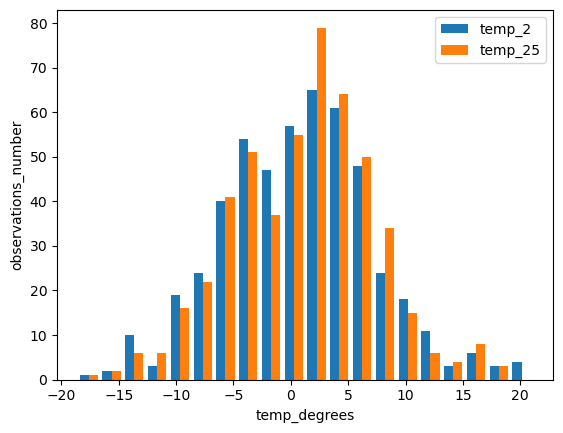

In [34]:
#For the chart, a temperature indicator variable was additionally created at 25 meters above the ground.
#It can be seen from the diagram that both at level of 2 and at the level of 25 meters above the ground, 
#the most common temperature indicator (mode) was about 3 degrees. In general, the number of observations 
#is enough to observe the distribution tending to normal.

data["temp_25"] = data["temp_2"] + data["temp_diff_25_2"]
attributes = ["temp_2", "temp_25"]
plt.hist(data[attributes], bins = 20, label=["temp_2", "temp_25"])
plt.legend(loc='upper right')
plt.xlabel('temp_degrees')
plt.ylabel('observations_number')
plt.show()

**Task 1.3** Draw the **boxplots** of the variables *log_cars_num*, *temp_2*, *wind_speed*, *wind_dir* grouped by each time frame *dow*, *month*, *year*. You should be able to analyze how the temperature varies across months on a single plot.

**Hint 1**: You may need the **hue** parameter in the plotting function to group the variables by time. See examples for interpretation in the documentation
**Hint 2:** You should end up with 12 plots in total, so try to optimize you code by running the drawing function in a cycle.

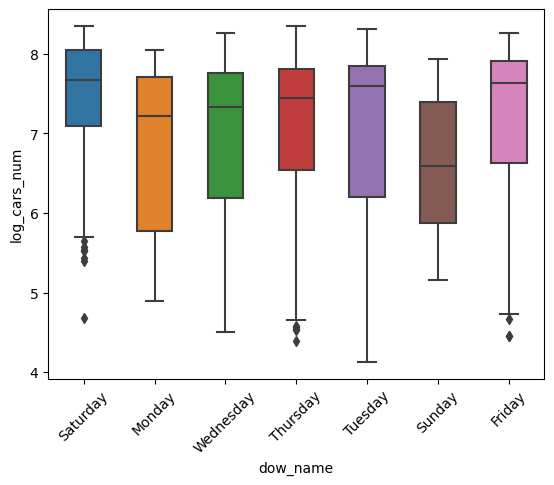

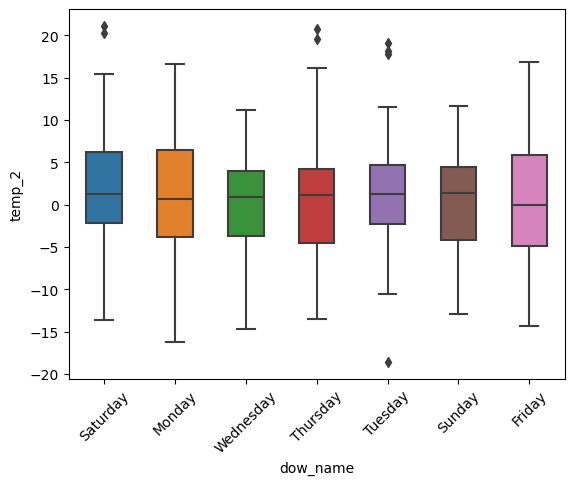

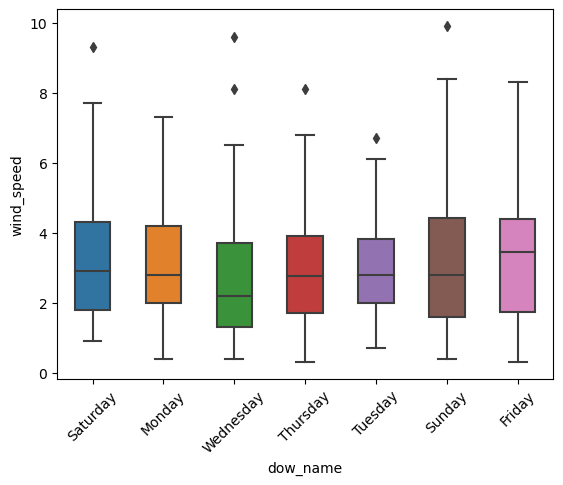

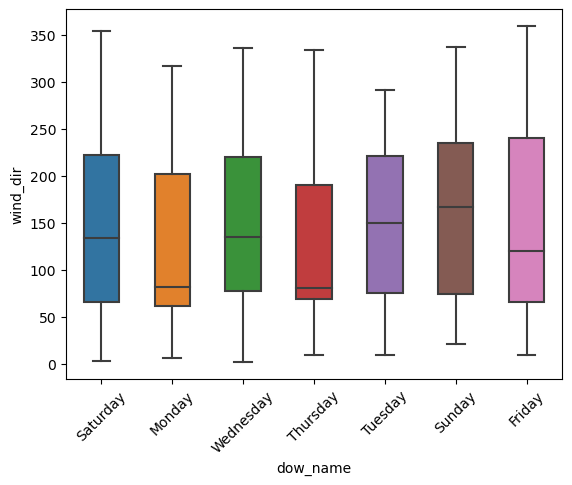

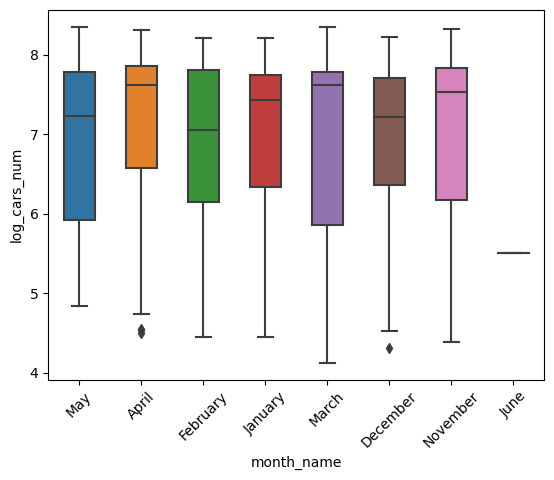

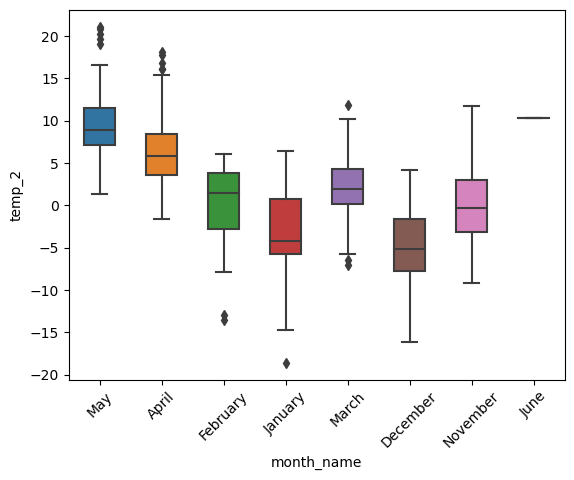

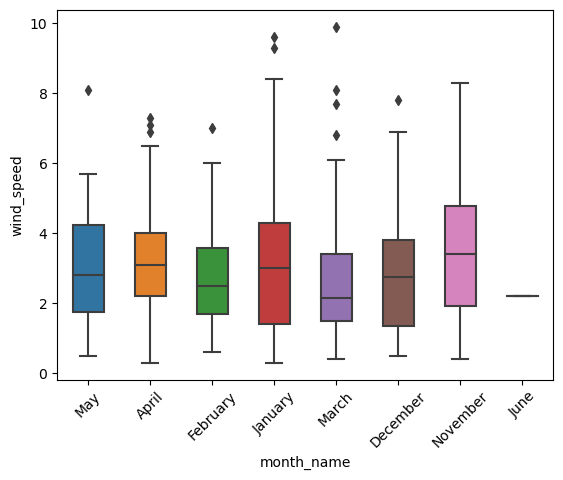

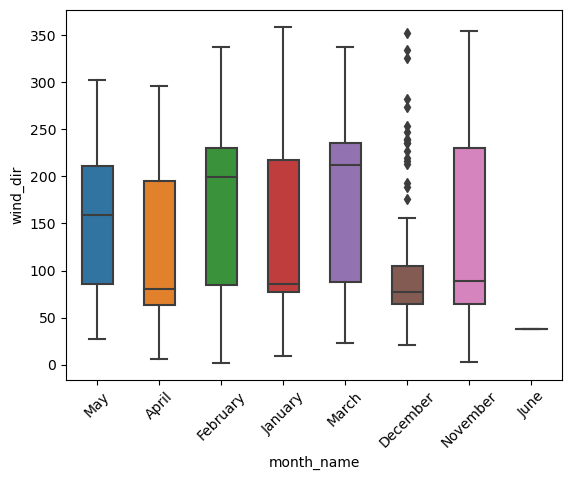

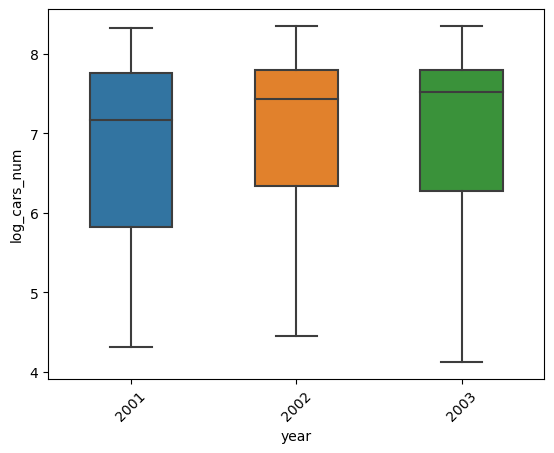

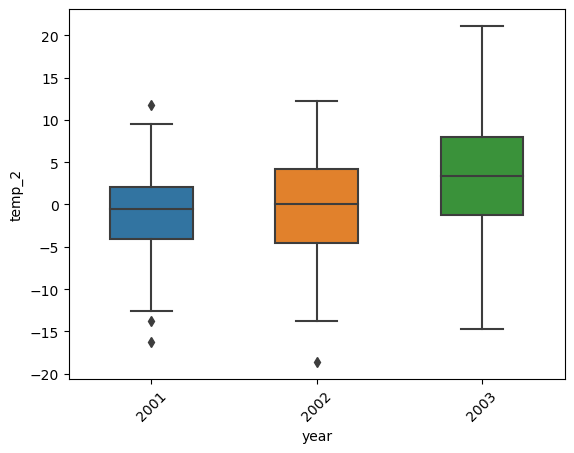

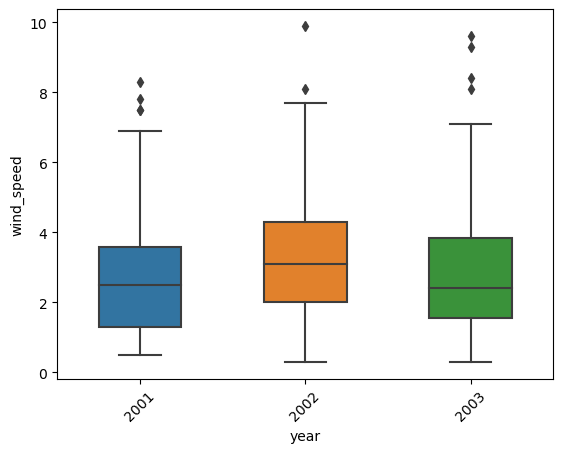

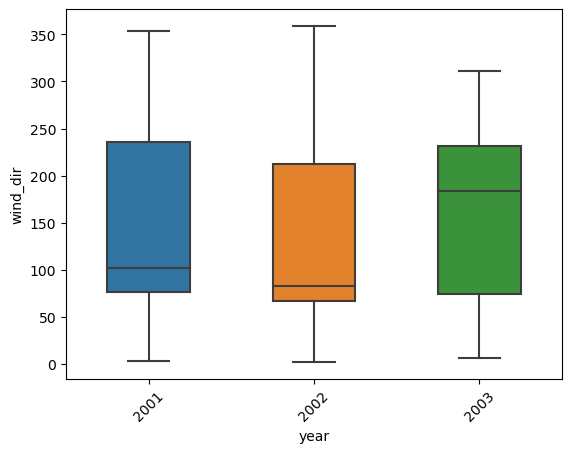

IndexError: list index out of range

In [36]:
#There are no anomalies in temperature changes during the year. 
#According to observations, the median temperature in November is approximately at the level of 0 degrees,
#then in December and January it remains at approximately -5, -4 degrees, and from February it begins to gradually rise
#every month, reaching 9 degrees in May.

X_var = ['dow_name', 'dow_name', 'dow_name', 'dow_name', 'month_name', 'month_name', 
         'month_name','month_name', 'year', 'year', 'year', 'year']
Y_var = ['log_cars_num', 'temp_2', 'wind_speed', 'wind_dir', 'log_cars_num', 'temp_2',
         'wind_speed', 'wind_dir', 'log_cars_num', 'temp_2', 'wind_speed', 'wind_dir' ]
for i in range(0, 4):
    sns.boxplot(x = X_var[i], y = Y_var[i] , data = data, width = 0.5)
    plt.xticks(rotation = 45)
    plt.show()
for i in range(4, 8):
    sns.boxplot(x = X_var[i], y = Y_var[i] , data = data, width = 0.5)
    plt.xticks(rotation = 45)
    plt.show()
for i in range(8, 13):
    sns.boxplot(x = X_var[i], y = Y_var[i] , data = data, width = 0.5)
    plt.xticks(rotation = 45)
    plt.show()


**Task 1.4** Return NO2 and number of cars to the original scale by raising those variables to exponent. Draw the histograms of the new variables and explain why the logarithm was used originally.

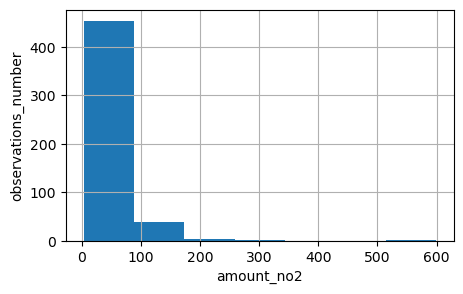

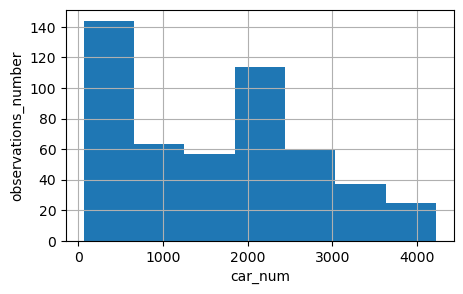

In [8]:
#The logarithm in the data visualization process is used to normalize the values so that when the indicators change, 
#the changes are fixed not in units, but in percentages. Thus, 
#the scale of values is reduced and the calculation becomes more convenient.
data['no2'] = np.exp(data['log_no2'])
data['cars_num'] = np.exp(data['log_cars_num'])
data['no2'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('amount_no2')
plt.ylabel('observations_number')
plt.show()
data['cars_num'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('car_num')
plt.ylabel('observations_number')
plt.show()

### Time series analysis

**Task 2.1** Plot the mean temperature each month for all time period. You should end up with a plot where x-axis is a format *yyyy-mm* and y-axis is the mean temperature in the corresponding month. Make sure your x-values are sorted in ascending order.

**Hint** Create a new column *yyyy-mm* and apply `sns.lineplot` with correct parameters. You should end up with the line which connects the points in the plot with the corresponding confidence interval for the variable out of the box! Please refer to the documentation

In [27]:
data.head()

data['time_y_m'] = data['year'].astype(str) + '-' + data['month_num'].astype(str).str.zfill(2)
data['time_y_m']


0      2003-05
1      2002-04
2      2003-02
3      2002-02
4      2002-01
        ...   
495    2002-03
496    2001-11
497    2002-03
498    2003-05
499    2002-02
Name: time_y_m, Length: 500, dtype: object

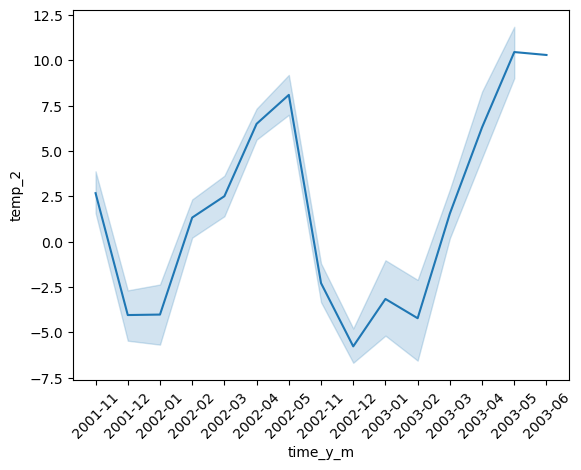

In [33]:
sns.lineplot(x = 'time_y_m', y = 'temp_2', estimator=np.mean, data = data.sort_values('time_y_m'))
plt.xticks(rotation = 45)
plt.show()

**Task 2.2** Plot the mean for other variables in the dataset across month and make a conclusion if you see any dynamic.

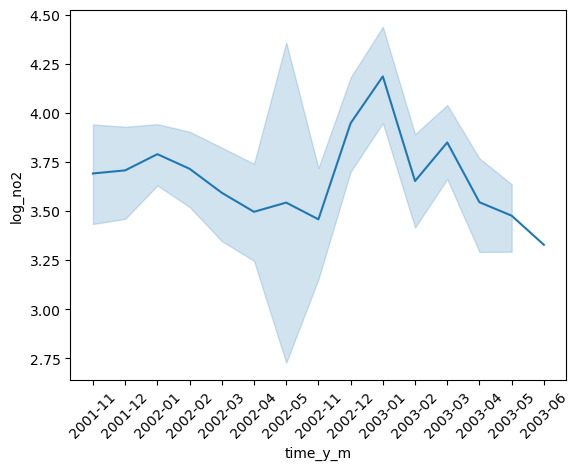

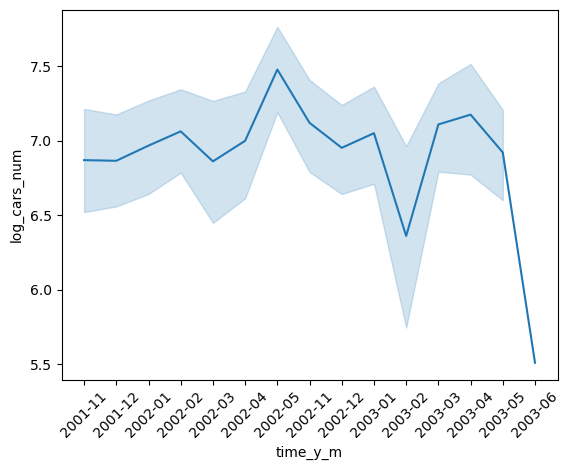

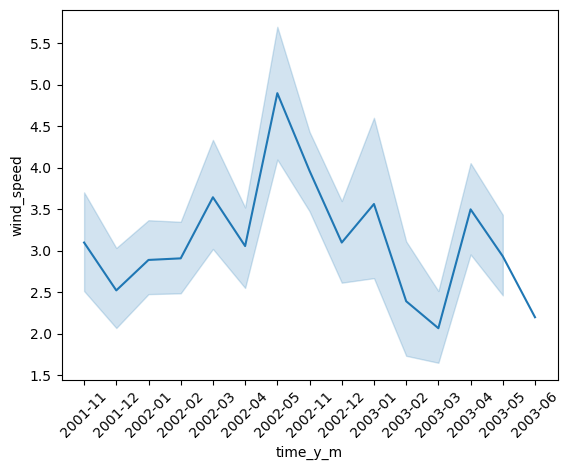

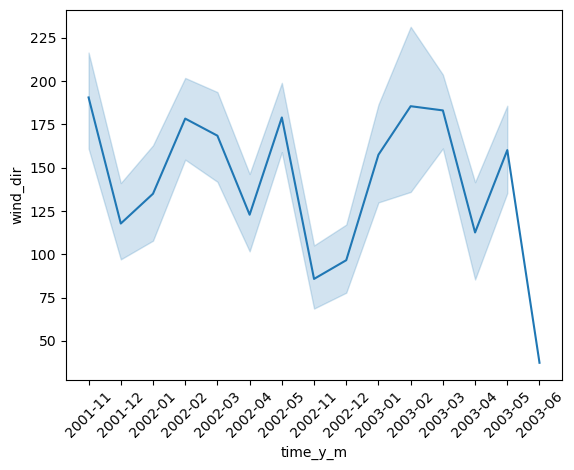

In [25]:
data.head()
x_var = ['time_y_m', 'time_y_m', 'time_y_m', 'time_y_m']
y_var = ['log_no2', 'log_cars_num','wind_speed', 'wind_dir']
for i in range(0, 4):
    sns.lineplot(x = x_var[i], y = y_var[i], data = data.sort_values('time_y_m'))
    plt.xticks(rotation = 45)
    plt.show()



**Task 2.3** Plot the mean temperature, number of cars, and wind direction each hour of the day.

In [27]:
# Your code here

### Answering the project questions

*1. Divide the hour of day into day and night hours, paying also attention to the season, that is quite relevant in Norway. Is there a significant difference in the mean of concentration of NO2 during day and night hours?*

**Hint 1** There are different daylight hours in different seasons of the year. You need to check it specifically for Norway in the internet and include that information in the dataframe, e.g. create a separate columns with the start and end hours of light day each month. Then you need to create a binary column *day-night* where you specify if this record falls into the day or the night hours.

**Hint 2** *Significant difference* means that you need to test the hypothesis of the mean equivalence between samples in the day and night hours:
H0: m1=m2
H1: m1 != m2

Please refer to our lectures how we did that. Use `scipy.stats.t.ppf` or `scipy.stats.norm.ppf` for calculating the inverse cumulative distribution function instead of referring to the tables in the internet. Make the significance level *alpha* of the test an adjusted variable.

**Hint 3** Before moving to the actual hypothesis testing try to simply visualize that difference somehow and make your own assumptions

In [28]:
# Your cool ideas and code goes here

*2.Divide each of the climatic variables x3,x4,x5 into two groups (high temperature/low temperature, high wind speed/low wind speed, etc.) and check for each of them if there is a significant difference in the mean of concentration of NO2 in the two identified groups*

**Hint 1** Based on the distribution of variables x3, x4, x5 choose the reasonable threshold for *high* and *low* values and explain your decision.

**Hint 2** Please refer to the *Hint 2* of the first task regarding the hypothesis testing.

**Hint 3** Before moving to the actual hypothesis testing try to simply visualize that difference somehow and make your own assumptions

In [29]:
# You statistical skills goes here

*Divide x2 into two groups (high number of cars/low number of cars), and check if there is a significant difference in the mean of concentration of NO2 in the two identified groups*

**Hint 1** Based on the distribution of variable x2 choose the reasonable threshold for *high* and *low* values and explain your decision. Try to convert the variable to the original scale and see if that helps

**Hint 2** Please refer to the *Hint 2* of the first task regarding the hypothesis testing.

**Hint 3** Before moving to the actual hypothesis testing try to simply visualize that difference somehow and make your own assumptions

In [30]:
# You passion to the research activities goes here

*4.Deduce which of the variables x2-x8 is more influent in changing the concentration of NO2 in the air, discussing also the presence of possible correlations between x2-x8*

**Step 1** Plot simple scatter plots of variables x2-x8 with NO2 and make the conclusion about the relationship of those variables
**Step 2** Calculate the Pearson correlation between variables x2-x8 with NO2
**Step 3 HARD LEVEL** Build a simple linear regression by choosing x2-x8 as X variables and predict Y variable N02. Measure the quality of the model. Analyze the feature weights and draw the conclusion about each feature contribution to the total result.

In [32]:
# You love to Python coding goes directly here